# ohlcv

In [1]:
import vectorbt as vbt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from numba import njit

In [3]:
print(vbt.settings.ohlcv['column_names'])

Config({
    "open": "Open",
    "high": "High",
    "low": "Low",
    "close": "Close",
    "volume": "Volume"
})


In [4]:
try:
    pd.DataFrame([1, 2, 3]).vbt.ohlcv.plot()
except Exception as e:
    print(e) # couldn't find default column names

Can only use .str accessor with string values!


In [5]:
ohlcv_ts = pd.DataFrame({
    'open': [1, 2, 3], 
    'high': [1, 2, 3], 
    'low': [1, 2, 3], 
    'close': [1, 2, 3], 
    'volume': [1, 2, 3]
})

In [6]:
ohlcv_ts = pd.DataFrame(
    columns=['open', 'high', 'low', 'close', 'volume'],
    index=[datetime(2018, 1, 1) + timedelta(days=i) for i in range(10)]
)
ohlcv_ts['open'] = np.cumsum(np.random.uniform(-0.8, 1, size=(10,)))
ohlcv_ts['close'] = ohlcv_ts['open'] + np.random.uniform(-1, 1, size=(10,))
ohlcv_ts['high'] = ohlcv_ts['open'] + np.random.uniform(0, 1, size=(10,))
ohlcv_ts['low'] = ohlcv_ts['open'] - np.random.uniform(0, 1, size=(10,))
ohlcv_ts['volume'] = np.cumsum(np.random.uniform(-1, 1, size=(10,)))

print(ohlcv_ts)

                open      high       low     close    volume
2018-01-01 -0.385236 -0.339812 -0.941729 -1.058755 -0.881574
2018-01-02 -0.243403  0.210847 -0.408890  0.158420 -1.149656
2018-01-03  0.226744  1.207481  0.198341  1.168544 -2.071525
2018-01-04  0.407461  1.294365 -0.223333  0.946101 -2.218826
2018-01-05  1.221150  1.988841  0.810106  0.834179 -2.940705
2018-01-06  2.022596  2.046477  1.293526  2.013281 -2.689034
2018-01-07  2.724580  3.303932  1.976807  3.468771 -1.720546
2018-01-08  2.057622  2.410773  1.251777  2.269435 -0.980795
2018-01-09  1.607800  1.720066  1.169075  2.456895 -1.621470
2018-01-10  2.069398  2.516643  1.838688  1.776437 -1.282516


In [7]:
try:
    ohlcv_ts.vbt.ohlcv.plot()
except Exception as e:
    print(e) # still couldn't find default column names

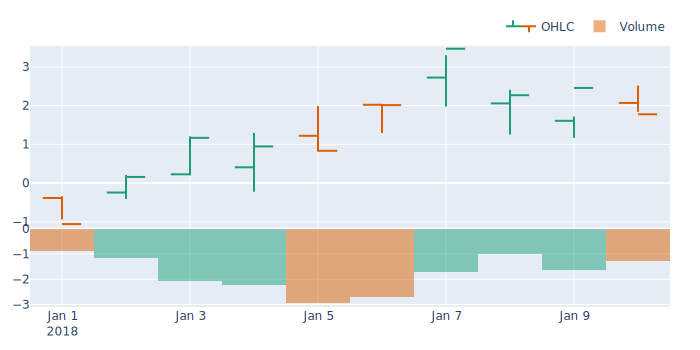

In [8]:
# Specify them manually
ohlcv_ts.vbt.ohlcv(column_names={
    'open': 'open', 
    'high': 'high', 
    'low': 'low', 
    'close': 'close', 
    'volume': 'volume'
}).plot().show_svg()

In [9]:
# Or by changing the defaults
vbt.settings.ohlcv['column_names'] = {
    'open': 'open', 
    'high': 'high', 
    'low': 'low', 
    'close': 'close', 
    'volume': 'volume'
}

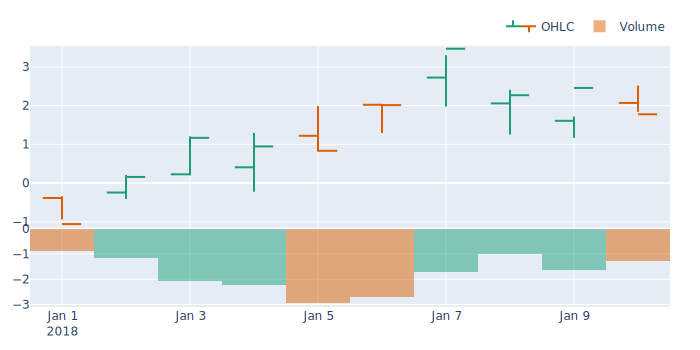

In [10]:
ohlcv_ts.vbt.ohlcv.plot().show_svg()

In [11]:
ohlcv_ts.vbt.ohlcv.stats()

Start             2018-01-01 00:00:00
End               2018-01-10 00:00:00
Period               10 days 00:00:00
First Price                 -0.385236
Lowest Price                -1.058755
Highest Price                3.468771
Last Price                   1.776437
First Volume                -0.881574
Lowest Volume               -2.940705
Highest Volume              -0.881574
Last Volume                 -1.282516
Name: agg_func_mean, dtype: object

In [14]:
big_ohlcv_ts = pd.DataFrame(np.random.uniform(1, 2, (10000, 5)), columns=ohlcv_ts.columns)

%timeit big_ohlcv_ts.vbt.ohlcv.stats()

7.62 ms ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


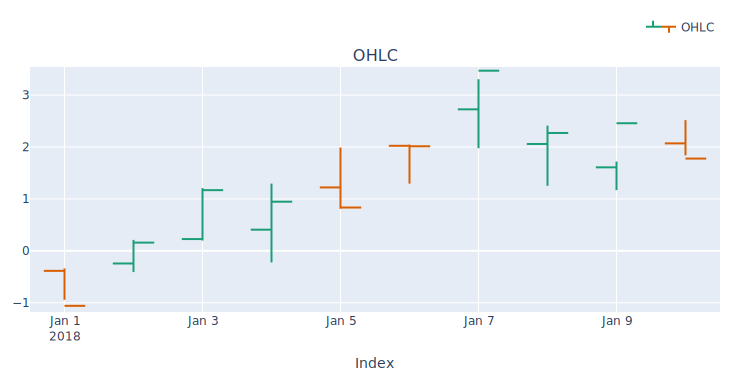

In [12]:
ohlcv_ts.vbt.ohlcv.plots().show_svg()